# Coordinate transformations with OMNI data

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences; egrimes(at)igpp.ucla.edu**

This notebook shows how to load OMNI data, combine the B-field components into a single variable, then use `cotrans` to transform the data to GSM coordinates, and finally plot the B-field in GSE and GSM coordinates

The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pyspedas

Load some OMNI data; we'll transform the B-field from GSE coordinates to GSM coordinates

In [3]:
pyspedas.omni.data(trange=['2015-10-16', '2015-10-17'])

07-Oct-24 16:50:17: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2015/
07-Oct-24 16:50:18: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf to omni_data/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf
07-Oct-24 16:50:26: Download complete: omni_data/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf


['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'NaNp_Ratio',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H']

The B-field components are stored as separate variables; to transform them using `cotrans`, we'll need to combine them into a single variable. We'll use `join_vec` from `pyspedas` to do this:

In [4]:
from pyspedas import join_vec

join_vec(['BX_GSE', 'BY_GSE', 'BZ_GSE'], new_tvar='B_GSE')

07-Oct-24 16:50:27: join_vec: The new_tvar parameter is deprecated. Please use newname instead.


'B_GSE'

Now we can transform `B_GSE` to GSM coordinates using `cotrans`

In [5]:
from pyspedas import cotrans

cotrans(name_in='B_GSE', name_out='B_GSM', coord_in='gse', coord_out='gsm')

07-Oct-24 16:50:27: ['gse', 'gsm']
07-Oct-24 16:50:27: Running transformation: subgse2gsm
07-Oct-24 16:50:27: Output variable: B_GSM


1

Set some plot metadata on our new variables

In [6]:
from pyspedas import options

options('B_GSE', 'ytitle', 'OMNI B-field')
options('B_GSE', 'ysubtitle', '[nT]')
options('B_GSE', 'legend_names', ['Bx GSE', 'By GSE', 'Bz GSE'])

options('B_GSM', 'ytitle', 'OMNI B-field')
options('B_GSM', 'ysubtitle', '[nT]')
options('B_GSM', 'legend_names', ['Bx GSM', 'By GSM', 'Bz GSM'])

Now we can plot the B-field in GSE and GSM coordinates

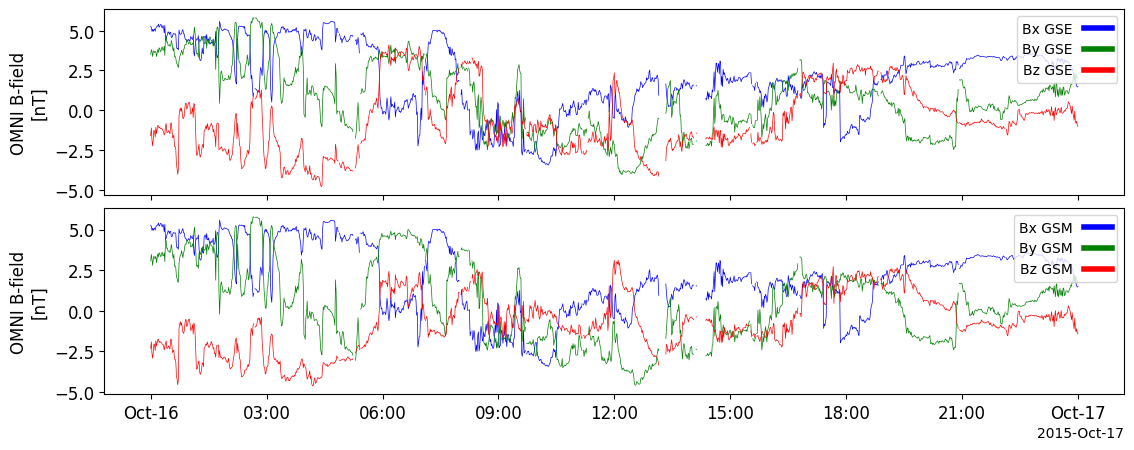

In [7]:
from pyspedas import tplot

tplot(['B_GSE', 'B_GSM'])